In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [16]:
uu = np.zeros((50, 330, 720))
tt = np.zeros((50, 330, 720))

kk = 0 
for year in np.arange(1980, 2016, 1):
    
    datadir = '/data/data_pub/SODA3.3.1/soda3.3.1_mn_ocean_reg_' + str(year) + '.nc'
    ds = xr.open_dataset(datadir)
    tt0 = ds.temp.mean('time').values
    uu0 = ds.u.mean('time').values
    uu = uu + uu0
    tt = tt + tt0
    kk = kk + 1


In [18]:
uu = uu / kk
tt = tt / kk

(-1000.0, 0.0)

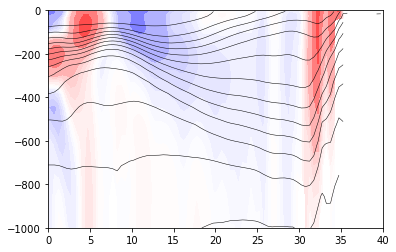

In [52]:

lev1 = [-0.5, -0.4, -0.3, -0.2, -0.1, -0.08, -0.06, -0.04, -0.02, -0.01, 0, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5]
lev2 = np.arange(4, 30, 2)
#plt.contourf(ds.latitude, -ds.depth, tt[:, :, 280], levels=20)
plt.contourf(ds.latitude, -ds.depth, uu[:, :, 280], levels=lev1, cmap='bwr')
plt.contour(ds.latitude, -ds.depth, tt[:, :, 280], levels=lev2, colors='k', linewidths=0.5)

plt.xlim(0, 40)
plt.ylim(-1000, 0)

(-1000.0, 0.0)

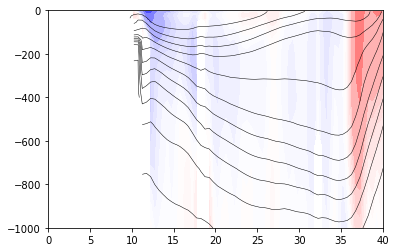

In [55]:

lev1 = [-0.5, -0.4, -0.3, -0.2, -0.1, -0.08, -0.06, -0.04, -0.02, -0.01, 0, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5]
lev2 = np.arange(4, 30, 2)
#plt.contourf(ds.latitude, -ds.depth, tt[:, :, 280], levels=20)
plt.contourf(ds.latitude, -ds.depth, uu[:, :, 590], levels=lev1, cmap='bwr')
plt.contour(ds.latitude, -ds.depth, tt[:, :, 590], levels=lev2, colors='k', linewidths=0.5)

plt.xlim(0, 40)
plt.ylim(-1000, 0)

In [33]:
ds.longitude[140]

<xarray.DataArray 'longitude' ()>
array(70.25, dtype=float32)
Coordinates:
    longitude  float32 70.25
Attributes:
    long_name:  longitude
    units:      degrees_east
    modulo:     360.0
    axis:       X

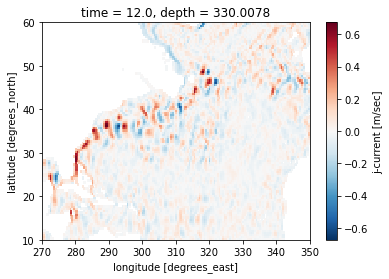

In [4]:
ds.sel(longitude=slice(270, 350), latitude=slice(10, 60)).v[-1, 20, :, :].plot()

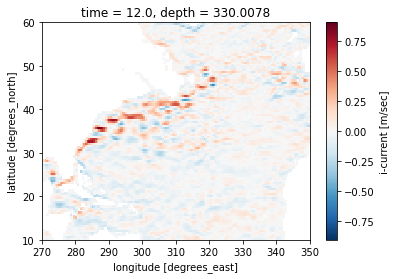

In [15]:
ds.sel(longitude=slice(270, 350), latitude=slice(10, 60)).u[-1, 20, :, :].plot()

In [5]:
uu = ds.sel(longitude=slice(270, 350), latitude=slice(10, 60)).u[-1, 20, :, :].values
vv = ds.sel(longitude=slice(270, 350), latitude=slice(10, 60)).v[-1, 20, :, :].values


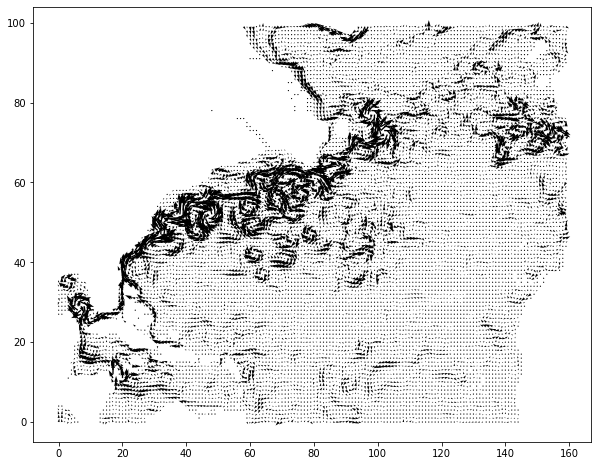

In [6]:
fig = plt.figure(figsize=(10, 8))
plt.quiver(uu, vv)